In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import mord
import itertools
import vbmfa.fa as vbfa


import matplotlib.pyplot as plt
import seaborn as sns
from plot_confusion import *
import matplotlib.cm as plt_cm
import matplotlib.colors as plt_col
import matplotlib.patches as plt_patches

In [2]:
def plot_scatter(x, classes, ax=None):
    ax = plt.gca() if ax is None else ax
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=np.min(classes), vmax=np.max(classes))
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(classes)
    ax.scatter(x[0, :], x[1, :], color=colors, s=20)
         
def plot_mse(mse):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(mse, linewidth=2, marker='s',markersize=5, markerfacecolor='red')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('MSE')
    
def plot_grid(n, ncols=4, size=(5, 5)):
    nrows = int(np.ceil(n/float(ncols)))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(size[0]*ncols, size[1]*nrows))
    ax = ax.ravel()
    return [fig, ax]

def plot_grid(n, ncols=4, size=(5, 5)):
    nrows = int(np.ceil(n/float(ncols)))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(size[0]*ncols, size[1]*nrows))
    ax = ax.ravel()
    return [fig, ax]
    
def plot_compress(q, n=30):
    np.random.seed(0)
    fa = vbfa.VbFa(data_y, q)
    fa.fit()
    y = fa.x_to_y()
    fig, ax = plot_grid(n, ncols=10)
    dim = int(np.sqrt(fa.P))
    for i in range(n):
        ax[i].matshow(y[:, i].reshape(dim, dim), cmap='binary')
        
def plot_images(images, n=30, size=2):
    fig, ax = plot_grid(n, ncols=10, size=(size, size))
    dim = int(np.sqrt(images.shape[0]))
    with sns.axes_style('white'):
        for i in range(n):
            ax[i].grid()
            ax[i].set_axis_off()
            ax[i].matshow(images[:, i].reshape(dim, dim), cmap='binary')
        
def plot_ve(ve):
    x = np.arange(len(ve))
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.set_xlabel('Factor')
    ax.set_ylabel('% Variance explained')
    ax.bar(x, ve)

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
music = df.iloc[:,:19]
movies = df.iloc[:,19:31]
interests = df.iloc[:,31:63]
personality = df.iloc[:,63:]
data = {'music':music,'movies':movies,'interests':interests,'personality':personality}

In [5]:
personality.columns

Index([u'Daily events', u'Prioritising workload', u'Writing notes',
       u'Workaholism', u'Thinking ahead', u'Final judgement', u'Reliability',
       u'Keeping promises', u'Loss of interest', u'Friends versus money',
       u'Funniness', u'Fake', u'Criminal damage', u'Decision making',
       u'Elections', u'Self-criticism', u'Judgment calls', u'Hypochondria',
       u'Empathy', u'Eating to survive', u'Giving', u'Compassion to animals',
       u'Borrowed stuff', u'Loneliness', u'Cheating in school', u'Health',
       u'Changing the past', u'God', u'Dreams', u'Charity',
       u'Number of friends', u'Waiting', u'New environment', u'Mood swings',
       u'Appearence and gestures', u'Socializing', u'Achievements',
       u'Responding to a serious letter', u'Children', u'Assertiveness',
       u'Getting angry', u'Knowing the right people', u'Public speaking',
       u'Unpopularity', u'Life struggles', u'Happiness in life',
       u'Energy levels', u'Small - big dogs', u'Personality',
  

In [6]:
np.random.seed(0)
data_y = personality.T.values
fa = vbfa.VbFa(data_y, 2)
mse = [fa.mse()]

In [7]:
fa.q_x.mean[0].shape

(707,)

In [8]:
data_y[1].shape

(707,)

MSE: 207.823319


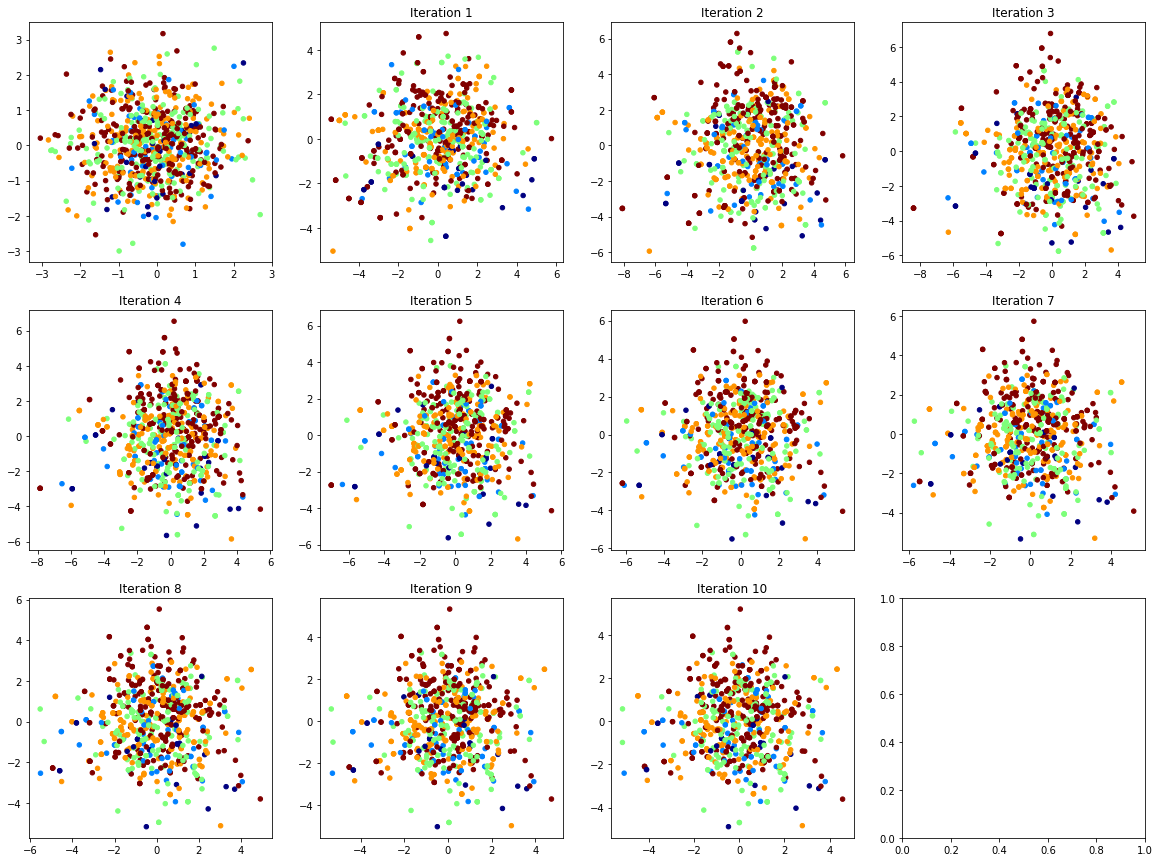

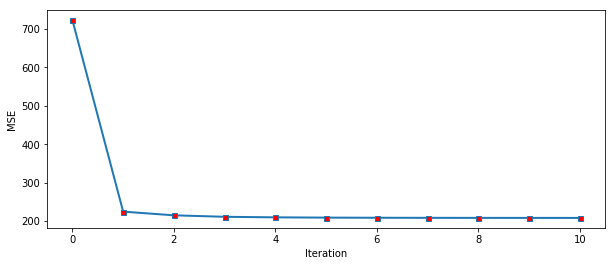

In [9]:

maxit = 10
fig, ax = plot_grid(maxit + 1)
plot_scatter(fa.q_x.mean, personality['Friends versus money'], ax[0])
fa.init()
for i in range(maxit):
    fa.update()
    j = i + 1
    plot_scatter(fa.q_x.mean, personality['Friends versus money'], ax[j])
    ax[j].set_title('Iteration {}'.format(j))
    mse.append(fa.mse())
plot_mse(mse)
print('MSE: {:f}'.format(mse[-1]))
